# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

I have chosen the Census dataset (censusData.csv), which contains demographic and employment information from 1994 U.S. Census database. I will predict whether an individual earns more than $ 50,000 per year. The label is income_binary of >50K or <=50K. This is a supervised learning problem because we have labeled outcomes such as income_binary. Moreover, this is a classification problem because we want to predict discrete categories. This is also a binary classification problem as there are only two outcomes: >50K and <=50K. The features include age, workclass, education, occupation, relationship, etc. This is an important problem because a company could use this model to offer personalized products through loans and credit cards as well as section their consumers based on income level. This allows for businesses to improve their efficiency by understanding their consumers price ranges.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
# YOUR CODE HERE
df = df[['age','workclass','education-num','marital-status','occupation','relationship','race','sex_selfID','hours-per-week','income_binary']]
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex_selfID,hours-per-week,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,40.0,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,13.0,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,40.0,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,40.0,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,<=50K
32557,40.0,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,40.0,>50K
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40.0,<=50K
32559,22.0,Private,9,Never-married,Adm-clerical,Own-child,White,Non-Female,20.0,<=50K


In [7]:
# YOUR CODE HERE
df.isnull().sum()

age                162
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
hours-per-week     325
income_binary        0
dtype: int64

In [9]:
# YOUR CODE HERE
df.head()

print(df['workclass'].unique())
print(df['workclass'].nunique())

print(df['marital-status'].unique())
print(df['marital-status'].nunique())

print(df['occupation'].unique())
print(df['occupation'].nunique())

print(df['relationship'].unique())
print(df['relationship'].nunique())

print(df['race'].unique())
print(df['race'].nunique())

print(df['sex_selfID'].unique())
print(df['sex_selfID'].nunique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
8
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
7
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
14
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
6
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Inuit' 'Other']
5
['Non-Female' 'Female']
2


{'whiskers': [<matplotlib.lines.Line2D at 0x796062332bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7960622c3130>,
 'boxes': [<matplotlib.lines.Line2D at 0x796062332910>],
 'medians': [<matplotlib.lines.Line2D at 0x7960622c3670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7960622c3910>],
 'means': []}

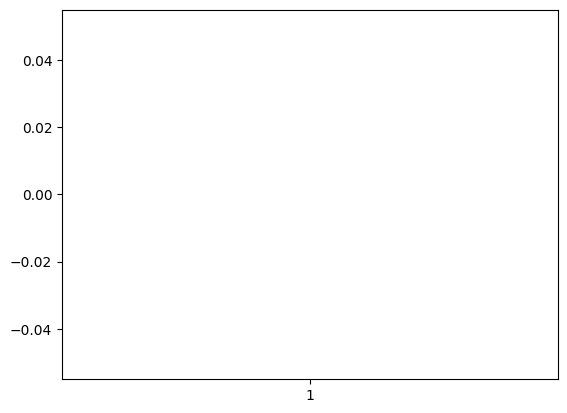

In [17]:
# YOUR CODE HERE
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7960622a50a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7960622a55e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x796062295d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7960622a5b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7960622a5dc0>],
 'means': []}

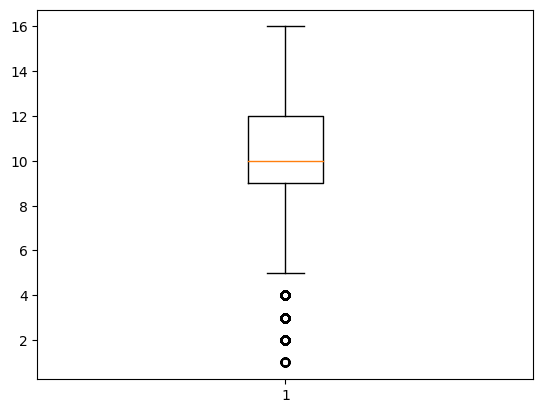

In [18]:
# YOUR CODE HERE
plt.boxplot(df['education-num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x796062207dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x796062217340>,
 'boxes': [<matplotlib.lines.Line2D at 0x796062207b20>],
 'medians': [<matplotlib.lines.Line2D at 0x796062217880>],
 'fliers': [<matplotlib.lines.Line2D at 0x796062217b20>],
 'means': []}

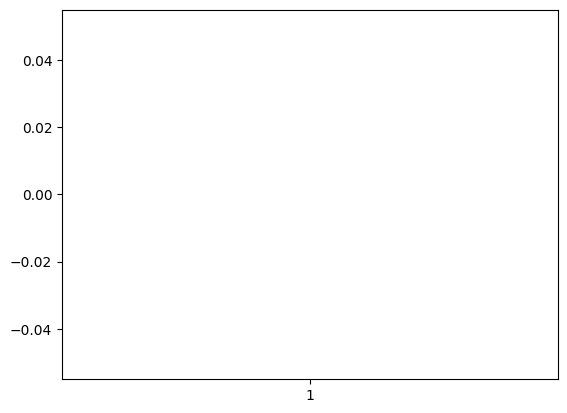

In [19]:
# YOUR CODE HERE
plt.boxplot(df['hours-per-week'])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

A new feature list includes the age, workclass, education-num, marital-status, occupation, relationship, race, sex_selfID, hours-per-week, and income_binary. I chose to remove the other columns that are not as significant for the outcome. We removed the null values along with the outliers and used one hot encoding for categorical features. We started with logistic regression model and then optimized it using GridSearchCV to find the optimal hyperparameters and maximize the accuracy. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [33]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler   
from sklearn.preprocessing import OneHotEncoder  
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [34]:
# YOUR CODE HERE
#step 1 - remove null values
print(df.isnull().sum())
df = df.dropna()

print(df.shape)

age                                     0
education-num                           0
hours-per-week                          0
income_binary                           0
workclass_Federal-gov                   0
workclass_Local-gov                     0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
marital-status_Divorced                 0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
occupation_Adm-clerical                 0
occupation_Armed-Forces                 0
occupation_Craft-repair                 0
occupation_Exec-managerial              0
occupation_Farming-fishing              0
occupation_Handlers-cleaners      

In [31]:
#step 2 - remove all outliers
numeric_cols = ['age', 'education-num', 'hours-per-week']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(df.shape)

(17468, 45)


In [35]:
#step 3 - use one hot encoding for all categorical items
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID'], drop_first=False)
df.columns

KeyError: "None of [Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',\n       'sex_selfID'],\n      dtype='object')] are in the [columns]"

In [36]:
#step 4 - train logistic regression model 
y = df['income_binary']
X = df.drop('income_binary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(max_iter=100)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8288494562106469


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#step 5 - use grid search cv for model selection
#used chat for pipeline line of code
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=1000))])

param_grid = {'logreg__C': [0.01, 0.1, 1, 10],'logreg__penalty': ['l1', 'l2'],'logreg__solver': ['liblinear', 'saga']}

grid = GridSearchCV(pipeline, param_grid, cv=6, scoring='accuracy')
grid_search = grid.fit(X_train, y_train)

print("Parameters:", grid_search.best_params_)
print("CV Score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
CV Score: 0.8311864891942178
Test Accuracy:  0.8319977103606182
